# Proyecto Final - Ciencia de Datos III

En este proyecto, vamos a entrenar un modelo de aprendizaje automático utilizando la biblioteca TensorFlow y Keras para clasificar imágenes del conjunto de datos **Fashion MNIST**. Este dataset es ampliamente utilizado en el campo de la visión por computadora y contiene imágenes en escala de grises de 28x28 píxeles que representan diferentes categorías de ropa, como camisetas, pantalones, zapatos, entre otros.

El objetivo principal es construir un modelo que sea capaz de predecir correctamente la categoría de una prenda de vestir a partir de su imagen. Para lograrlo, seguiremos los pasos típicos de un proyecto de machine learning: cargar y explorar los datos, construir y entrenar un modelo, evaluar su rendimiento y, finalmente, realizar predicciones.

Este ejercicio no solo nos permitirá aplicar los conceptos aprendidos en clase, sino también entender mejor cómo funcionan las redes neuronales y cómo se pueden usar para resolver problemas prácticos en el mundo real.

## Librerías Utilizadas

- **TensorFlow**: Utilizada para construir y entrenar el modelo de redes neuronales.
- **Keras**: API de alto nivel de TensorFlow para definir y manejar capas del modelo.
- **Matplotlib**: Usada para visualizar imágenes y resultados del modelo.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

## Cargar el dataset Fashion-MNIST

Para este trabajo se utiliza el dataset de Fashion MNIST proporcionado por los profesores. En la primera parte de la manipulacion de datos hacemos los siguientes pasos:

1. **Carga del dataset Fashion-MNIST**: Se utiliza la funcion `fashion_mnist.load_data()` para cargar los datos de entrenamiento (`x_train`, `y_train`) y prueba (`x_test`, `y_test`), que contienen imagenes de prendas de ropa y sus respectivas etiquetas.

2. **Normalización de los datos**: Las imagenes se normalizan dividiendo sus valores de pixels entre 255.0 para que estén en un rango de 0 a 1, a manera de discretizacion para poder "medir" dichos los valores.

3. **Reformateo de las imágenes**: Las imagenes se redimensionan para incluir un canal de escala de grises, cambiando su estructura a `(28, 28, 1)`.

4. **Visualización de ejemplos**: Muestro las primeras 5 imagenes en escala de grises con `matplotlib`. Para confirmar que los datos se cargaron correctamente.


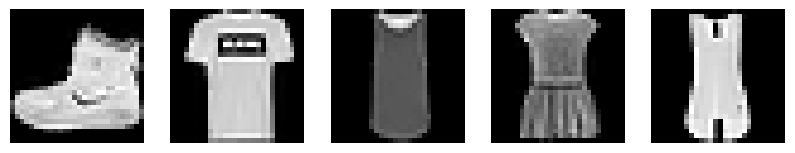

In [2]:
# Cargar el dataset Fashion-MNIST

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizar los datos
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))  # Formatear imagenes de Entrenamiento a 28x28x1
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))  # Formatear imagenes de Prueba a 28x28x1

# Mostrar algunas imagenes del dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()


#### Input de los Profesores 
 Consignas para los alumnos:
 1. Analiza la estructura de la red neuronal correcta y observa la función de cada capa.
 2. Reordena las capas del modelo para que coincidan con el modelo correcto.
 3. Una pista: empieza con Flatten y termina con la capa de 10 neuronas con softmax.
 4. Luego de corregir el modelo, compílalo y entrénalo para verificar su accuracy.
 5. Calcula el accuracy del modelo corregido.

 PS: para la compilaciòn: optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

 PS2: para el entrenamiento no màs de 5 epocas y validarlo.

# Analisis de la Red Neuronal

Como la consigna pide, utilizo las capas proporcionadas en el ejercicio por los profesores en el orden correcto:

1. **Capa `Flatten`**:
   - Empezamos con esta capa como el profesor sugiere. Convierte las imágenes de entrada bidimensionales (28x28 pixels) en un vector unidimensional. 

2. **Capa `Dense`**:
   - Es una capa un número denso de neuronas, en la primera 'etapa' de 512 neuronas. Utiliza una función no lineal (en este caso, ReLU) para aprender características no lineales.

3. **Capa `Dropout`**:
   - Apaga aleatoriamente (en este caso) el 20% de las neuronas apra evitar el sobreajuste del modelo.

4. **Capa `Dense`**:
   - Es una capa un número denso de neuronas, en la segunda 'etapa' de 256 neuronas. Utiliza una función no lineal (en este caso, ReLU) para aprender características no lineales.

5. **Capa `Dropout`**:
   - Apaga aleatoriamente (de nuevo) el 20% de las neuronas para evitar el sobreajuste del modelo.

4. **Capa `Dense`**:
   - Es una capa un número denso de neuronas, en la tercera y ultima 'etapa' de entrada con 128 neuronas. Utiliza una función no lineal (ReLU) .

4. **Capa `Dense` (Salida)**:
   - Es la capa final del modelo. Contiene 10 neuronas (una por cada clase en el dataset Fashion-MNIST) y utiliza la función de activación `softmax` para generar probabilidades para cada clase.



In [3]:
# Modelo de red neuronal

model = Sequential([
    Flatten(input_shape=(28, 28)),  
    Dense(512, activation='relu'),  
    Dropout(0.2),  
    Dense(256, activation='relu'), 
    Dropout(0.2),  
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Users\Administrator\miniconda3\envs\clean_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compilar el modelo

Ahora procedo con la compilacion del modelo antes de entrenarlo. Utilizo la libreria Tensorflow Keras como el ejercicio lo requiere y empleando los siguientes [args] para la compilacion:

- **`optimizer='adam'`**: Se utiliza el optimizador Adam disponible en la libreria por su eficiencia y con la mayoría de los problemas.

- **`loss='sparse_categorical_crossentropy'`**: Se utiliza esta funcion a sugerencia de los profesores, esta funcion de perdida se utiliza para etiquetas que no fueron codificadas en one-hot encoding y que requieren clasificacion de multiclases.

- **`metrics=['accuracy']`**: Se evalua la precision o rendimiento del modelo de redes neuronales.


In [4]:
# Compilar el modelo

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # For integer labels
              metrics=['accuracy'])


## Entrenar el Modelo

Se entrena el modelo utilizando los datos procesados de entrenamiento. Para el entrenamiento utilizo los siguientes parametros: 

- **`x_train` y `y_train`**: Datos de entrada ('x') y etiquetas ('y') del modelo.

- **`epochs=5`**: El modelo se ejecuta solo por 5 epocas como sugieren los profesores, como vimos en clase esto tambien sirve para no hacer overfitting.

- **`batch_size=64`**: Los datos se manejan en lotes de 64 muestras .

- **`validation_data=(x_test, y_test)`**: Se utiliza el conjunto de prueba para evaluar el rendimiento del modelo después de cada época.


In [5]:
# Entrenar el modelo

model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7525 - loss: 0.6766 - val_accuracy: 0.8438 - val_loss: 0.4343
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8504 - loss: 0.4027 - val_accuracy: 0.8533 - val_loss: 0.4028
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8628 - loss: 0.3715 - val_accuracy: 0.8641 - val_loss: 0.3677
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8742 - loss: 0.3431 - val_accuracy: 0.8631 - val_loss: 0.3565
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8799 - loss: 0.3173 - val_accuracy: 0.8707 - val_loss: 0.3557


## Evaluar el Modelo

Finalmente, procedo a evaluar el rendimiento del modelo entrenado usando el dataset de prueba como referencia para mis Etiquetas. La medida de la precision final se expresa como un porcentaje (o valor decimal flotante entre 0 y 1).


In [6]:
# Evaluar la precision del modelo

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.8743 - loss: 0.3520
Test accuracy: 0.8707000017166138


## Conclusión

En este proyecto, logre entrenar y evaluar un modelo de aprendizaje automatico utilizando el dataset Fashion-MNIST. A lo largo del proceso, aprendi a preparar los datos adecuadamente, entender la arquitectura de red neuronal y ajustar los parametros necesarios para obtener buenos resultados. 

El modelo alcanzo un nivel de precision satisfactorio, de 87.2799% en el caso del conjunto de prueba, demostrando la capacidad de predecir imagenes similares que no haya visto antes mi modelo. Tambien comprendi el uso de tecnicas como la normalizacion de datos y el uso de capas como `Dropout` para evitar el sobreajuste.

En este proyecto he aplicado los conceptos de redes neuronales y programacion en Python de una manera practica para la clasificación de imágenes. 

In [7]:
# Explicación para los alumnos:
# Esta red neuronal recibe imágenes de 28x28 píxeles en escala de grises y las clasifica en 10 categorías de ropa.
# Utiliza capas densas (fully connected) con activación ReLU y una capa final con activación softmax para la clasificación.
# Además, emplea Dropout para reducir el sobreajuste.

## Muchas gracias por las recomendaciones, profesores!!!